<center>
    
# Boston Housing Price

</center>

In [1]:
# basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# dataset
from sklearn.datasets import load_boston

In [2]:
# custom command from scikit-learn
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of Houses')

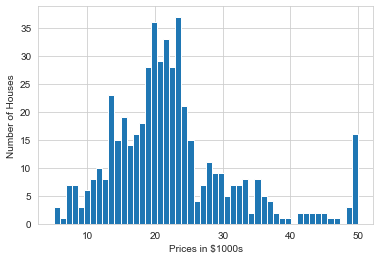

In [3]:
# plotting the number of houses with respect of prices
plt.hist(boston.target, bins = 50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Price in $1000s')

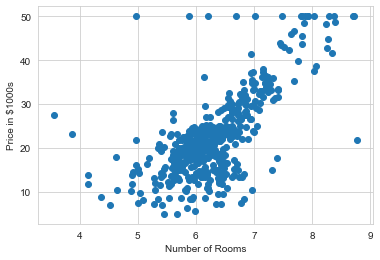

In [4]:
# scatterplot between number of rooms and housing price
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel('Number of Rooms')
plt.ylabel('Price in $1000s')

In [5]:
#transforming the data into pandas dataframe
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# adding price from boston.target to the dataframe
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


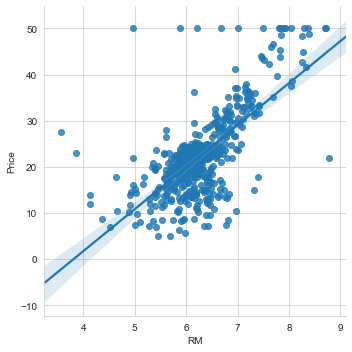

In [7]:
# giving trendline to scatterplot
sns.lmplot('RM', 'Price', data = boston_df)

#### Equation of Linear Regression
Equation: 
$$y = mx + b$$
<br>
where: 
<br>
<center>m = slope<center>
<br>
<center>x = explanatory variable<center>
<br>
<center>b = intercept<center>
    

which can be rewritten as:
$$ y = Ap $$


where:
$$ A = \begin{bmatrix} x & 1 \end{bmatrix}$$

$$ p = \begin{bmatrix} m \\ b \end{bmatrix}$$

In [8]:
# setting up x as median room values
x = boston_df.RM

# using vstack method to make x two-dimensional
x = np.vstack(boston_df.RM)

# setting up y as the target price of the house
y = boston_df.Price

In [9]:
# making the x array to become [x 1]
x = np.array([[value, float(1)] for value in x]) 
x = x.astype(np.float64)
x

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [10]:
# using linear algebra with least square method
least_square = np.linalg.lstsq(x, y)
m, b = least_square[0]

D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


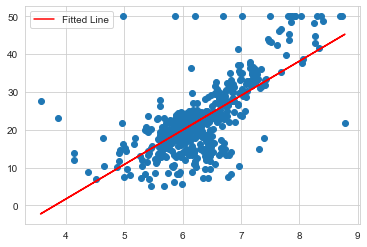

In [11]:
# plotting the linear regression graph
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM
plt.plot(x, m*x + b, color = 'r', label = 'Fitted Line')
plt.legend()

In [12]:
# getting error/noise 
error_total = least_square[1]

rmse = np.sqrt(error_total/len(x))
print('The Root Mean Square Error is %.2f' %rmse)

The Root Mean Square Error is 6.60


<div style="text-align: justify">  
The price of the house will not vary more than two times RMSE value 95% of the time. Thus, it can reasonably be expected a house price to be within $13,200 of our line fit 95% of the time.
</div>

In [13]:
# activating Linear Regression method
linear_reg = LinearRegression()

In [14]:
# setting up the explanatory variables and dependent variable
x_multi = boston_df.drop('Price', 1)
y_target = boston_df.Price

In [15]:
# fitting the line
linear_reg.fit(x_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# intercept and number of coefficients (parameters)
print(
    'The estimated intercept coefficient is %.2f\nThe number of coefficents used is %d' 
    %(linear_reg.intercept_, len(linear_reg.coef_))
)

The estimated intercept coefficient is 36.46
The number of coefficents used is 13


In [17]:
# estimated coefficients for each parameter
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(linear_reg.coef_)
coeff_df.dropna()

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [18]:
# dividing the data into training dataset and testing dataset
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, boston_df.Price)

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(379, 1) (127, 1) (379, 1) (127, 1)


In [19]:
# fitting the training data
linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# predicted values and the actual values
pred_train = linear_reg.predict(x_train)
pred_test = linear_reg.predict(x_test)

# MAE, MSE, RMSE for training data
print('Mean Absolute Error of training data: %.2f' %metrics.mean_absolute_error(y_train, pred_train))  
print('Mean Squared Error of training data: %.2f' %np.mean((y_train - pred_train)**2))
print('Root Mean Squared Error of training data: %.2f\n' %np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

# MAE, MSE, RMSE for test data 
print('Mean Absolute Error of test data: %.2f' %metrics.mean_absolute_error(y_test, pred_test)) 
print('Mean Squared Error of test data: %.2f' %np.mean((y_test - pred_test) ** 2))
print('Root Mean Squared Error of test data: %.2f' %np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Mean Absolute Error of training data: 4.62
Mean Squared Error of training data: 46.70
Root Mean Squared Error of training data: 6.83
Mean Absolute Error of test data: 3.92
Mean Squared Error of test data: 34.47
Root Mean Squared Error of test data: 5.87


In [21]:
# comparison between the actual values and predicted values
value_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_test.flatten()})
value_df_first_ten = value_df.head(10)
value_df_first_ten

,Actual,Predicted
0,29.0,26.755399
1,26.5,27.260527
2,22.6,21.116332
3,28.1,23.531763
4,21.2,22.218429
5,18.5,19.123371
6,17.8,22.034746
7,11.5,14.485377
8,5.6,19.968313
9,23.8,23.017450


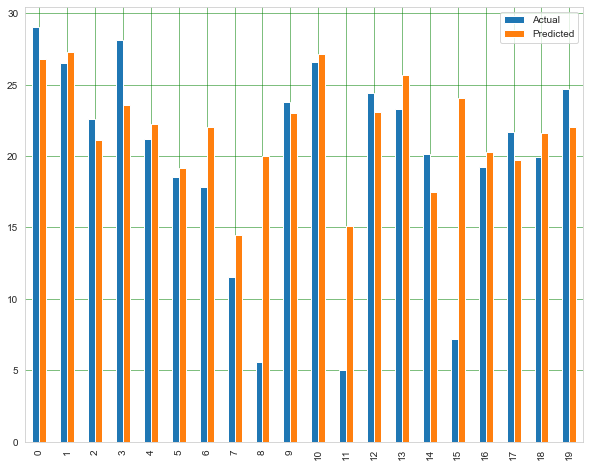

In [22]:
# plotting comparison
value_df_first_ten.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0.5, 1.0, 'Residual Plot')

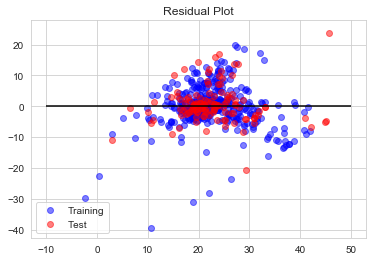

In [23]:
# plotting residuals
train = plt.scatter(pred_train, (pred_train - y_train), color = 'b', alpha = 0.5)
test = plt.scatter(pred_test, (pred_test - y_test), color = 'r', alpha = 0.5)

plt.hlines(y = 0, xmin = -10, xmax = 50)
plt.legend((train, test), ('Training', 'Test'), loc = 'lower left')
plt.title('Residual Plot')